In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # plt.show()를 하지 않아도 자동으로 생성되도록 만든다.

UsageError: unrecognized arguments: # plt.show()를 하지 않아도 자동으로 생성되도록 만든다.


In [72]:
# 클래스 레이블
# TP = 실제로 맞춘 개수 
# FP = 실제의 개수보다 더 예측한 수
# FN = 실제의 개수보다 부족한 수
# TN = 실제로 틀리고 예측도 틀리다고 예측함
# df_good와 df_good2의 search_label에 대하여 confusion matrix 실시
class CustomConfusionMatrix:
    def __init__(self, df_good, df_good2):
        self.df_good = df_good
        self.df_good2 = df_good2
    
    def calculate_confusion_matrix(self):
        labels = ['invade', 'person']
        
        # 혼동행렬 변수 초기화
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        
        # 데이터프레임 행별로 비교
        #invade
        for i in range(len(self.df_good)):
            invade_true = self.df_good.loc[i, 'invade']
            invade_pred = self.df_good2.loc[i, 'invade']
            
            # TP, TN, FP, FN 계산
            if invade_true > 0 and invade_pred > 0:
                TP += min(invade_true, invade_pred)
                FN += max(invade_true - invade_pred, 0)
                FP += max(invade_pred - invade_true, 0)
            elif (invade_true == 0 and invade_pred == 0) and (person_true == 0 and person_pred == 0):
                TN += 1
            elif invade_true == 0 and invade_pred > 0:
                FP += invade_pred
            elif invade_true > 0 and invade_pred == 0:
                FN += invade_true
        #person
            person_true = self.df_good.loc[i, 'person']
            person_pred = self.df_good2.loc[i, 'person']
            
            # TP, TN, FP, FN 계산
            if person_true > 0 and person_pred > 0:
                TP += min(person_true, person_pred)
                FN += max(person_true - person_pred, 0)
                FP += max(person_pred - person_true, 0)
            elif person_true == 0 and person_pred > 0:
                FP += invade_pred
            elif person_true > 0 and person_pred == 0:
                FN += invade_true
        
        # 혼동행렬 출력
        confusion_matrix = np.array([[TP, FP], [FN, TN]])
        return confusion_matrix
    

    def accuracy(self):
        confusion_matrix = self.calculate_confusion_matrix()
        TP, FP, FN, TN = confusion_matrix.reshape(-1,)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        return accuracy
    
    def precision(self):
        confusion_matrix = self.calculate_confusion_matrix()
        TP, FP, FN, TN = confusion_matrix.reshape(-1,)
        precision = TP / (TP + FP)
        return precision
    

    def recall(self):
        confusion_matrix = self.calculate_confusion_matrix()
        TP, FP, FN, TN = confusion_matrix.reshape(-1,)
        recall = TP / (TP + FN)
        return recall
    

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()
        f1_score = 2 * precision * recall / (precision + recall)
        return f1_score


### 기존 영상과의 블러 차이를 보여줌

In [73]:

file_save_path = f"{os.getcwd()}/confusion_matrix/blur/"
csv_save_path = f"{file_save_path}/csv/"

# 비교할 첫번째 영상
output_csv = f'{csv_save_path}/fram_quality_01.csv'  # 저장할 CSV 파일 경로로 변경해주세요
df_good = pd.read_csv(output_csv)

In [74]:
recall, precision, f1_score, accuracy = [], [], [], []
df = pd.DataFrame(columns=['recall', 'precision', 'f1_score','accuracy'])
cm_df = pd.DataFrame(columns= ['TP', 'FP', 'FN', 'TN'])                     
for csv_path in os.listdir(csv_save_path)[:-1]:
    df_dummy = pd.read_csv(f"{csv_save_path}/{csv_path}")
    cm = CustomConfusionMatrix(df_good, df_dummy)
    cm_font = cm.calculate_confusion_matrix()
    data_dummy = {'TP':[cm_font[0][0]], 
                        'FP': [cm_font[0][1]], 
                        'FN': [cm_font[1][0]],
                        'TN':[cm_font[1][1]]}
    confusion_matrix_df = pd.DataFrame(data_dummy)
    cm_df = pd.concat([cm_df, confusion_matrix_df], axis = 0)
    f1_score.append(cm.f1_score())
    precision.append(cm.precision())
    recall.append(cm.recall())
    accuracy.append(cm.accuracy())
df['recall'] = recall
df['precision'] = precision
df['f1_score'] = f1_score
df['accuracy'] = accuracy

fram_quality_01.csv
fram_quality_02.csv
fram_quality_03.csv
fram_quality_04.csv
fram_quality_05.csv
fram_quality_06.csv
fram_quality_07.csv
fram_quality_08.csv
fram_quality_09.csv
fram_quality_10.csv
fram_quality_11.csv
fram_quality_12.csv
fram_quality_13.csv
fram_quality_14.csv
fram_quality_15.csv
fram_quality_16.csv
fram_quality_17.csv
fram_quality_18.csv
fram_quality_19.csv
fram_quality_20.csv
fram_quality_21.csv
fram_quality_22.csv
fram_quality_23.csv
fram_quality_24.csv
fram_quality_25.csv
fram_quality_26.csv
fram_quality_27.csv
fram_quality_28.csv
fram_quality_29.csv


### psnr을 가져옴

In [76]:
df_psnr = pd.read_csv(f"{csv_save_path}/result_v30.csv")
df_psnr = df_psnr.drop(['invade','person','0'],axis = 1)
df_psnr = df_psnr.dropna(axis = 0)
df_psnr = df_psnr.reset_index(drop=True)
df['PSNR'] = df_psnr['PSNR']

In [77]:
# 원하는 point 찍기
def get_crosspt(x11,y11, x12,y12, x21,y21, x22,y22):
    if x12==x11 or x22==x21:
        print('delta x=0')
        return None
    m1 = (y12 - y11) / (x12 - x11)
    m2 = (y22 - y21) / (x22 - x21)
    if m1==m2:
        print('parallel')
        return None
    print(f"p1 = ({x11},{y11}) ,p2 = ({ x12}, {y12}), gradient1 = {m1} \np3({x21},{ y21}), p4 = ({x22}, {y22}), grediant2 = {m2}")
    cx = (x11 * m1 - y11 - x21 * m2 + y21) / (m1 - m2)
    cy = m1 * (cx - x11) + y11

    return cx, cy

find_index = 'accuracy'
def get_corsspoint(df, find_index, point):
    df = df.sort_values(by = find_index)
    check_ = df[find_index].sub(point).abs().argsort()[:2]
    closest_above = df[df[find_index] < point].max()
    closest_below = df[df[find_index] > point].min()
        
    find_position = get_crosspt(closest_above['PSNR'], closest_above[find_index], 
                                closest_below['PSNR'], closest_below[find_index],
                                0,point,
                                df['PSNR'][0],point)
    return find_position

p1 = (196.335527856307,0.8906968517863459) ,p2 = (361.20199909922445, 1.0), gradient1 = 0.0006629798490234239 
p3(0,0.9), p4 = (361.20199909922445, 0.9), grediant2 = 0.0
p1 = (96.76335036813056,0.8436588921282799) ,p2 = (113.79273425787208, 0.9066914498141264), gradient1 = 0.0037013997742934906 
p3(0,0.9), p4 = (361.20199909922445, 0.9), grediant2 = 0.0
p1 = (96.76335036813056,0.7913177234660741) ,p2 = (113.79273425787208, 0.9043381535038931), gradient1 = 0.006636789138678257 
p3(0,0.9), p4 = (361.20199909922445, 0.9), grediant2 = 0.0
p1 = (96.76335036813056,0.8834355828220859) ,p2 = (36.80705505063087, 0.9019970414201184), gradient1 = -0.000309583147186462 
p3(0,0.9), p4 = (361.20199909922445, 0.9), grediant2 = 0.0


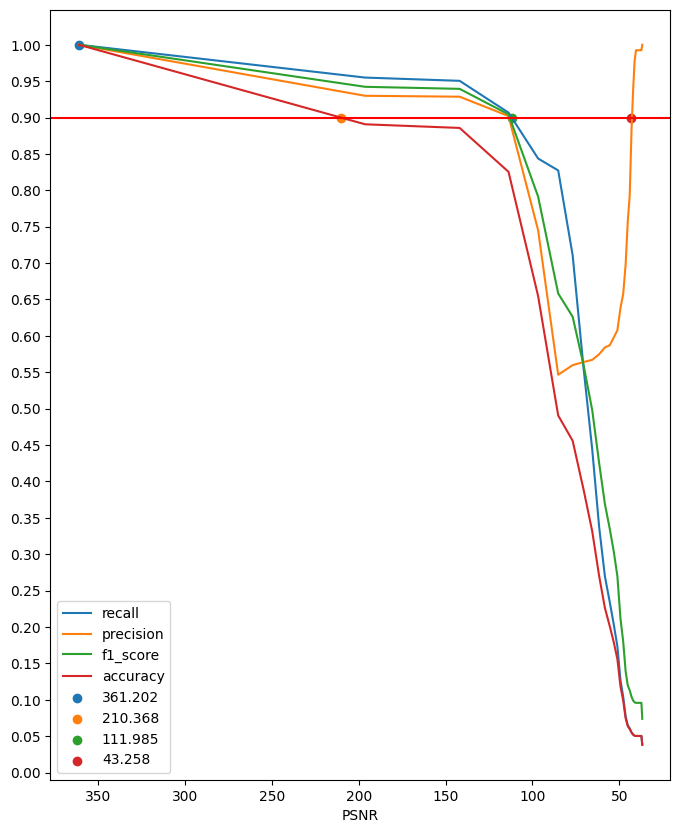

In [81]:
find_point = 0.90
plt.figure(figsize= (8, 10))
plt.plot(df['PSNR'], df['recall'], label = 'recall')
plt.plot(df['PSNR'], df['precision'], label = 'precision')
plt.plot(df['PSNR'], df['f1_score'], label = 'f1_score')
plt.plot(df['PSNR'], df['accuracy'], label = 'accuracy')
plt.yticks([i/20 for i in range(21)])

acc_point = get_corsspoint(df, 'accuracy',find_point )
recall_point = get_corsspoint(df, 'recall',find_point )
f1_point = get_corsspoint(df, 'f1_score',find_point )
precision_point = get_corsspoint(df, 'precision',find_point )

Point_df = pd.DataFrame([acc_point,
            recall_point,
            f1_point,
            precision_point], columns= ['psnr', 'point'])
Point_df = Point_df.sort_values(by = 'psnr',ascending=False)
first_row = Point_df.iloc[0]
last_row = Point_df.iloc[-1]
last_second_row = Point_df.iloc[-2]

plt.scatter(df['PSNR'][0],df['accuracy'][0], label = round(df['PSNR'][0],3))
plt.scatter(first_row.iloc[0], first_row.iloc[1], label = round(first_row.iloc[0],3))
plt.scatter(last_second_row.iloc[0], last_second_row.iloc[1], label = round(last_second_row.iloc[0],3))
plt.scatter(last_row.iloc[0], last_row.iloc[1], label = round(last_row.iloc[0],3))

plt.gca().invert_xaxis()
plt.xlabel('PSNR')

plt.axhline(y = find_point, color = 'r')

plt.legend()

초기보다 열화가 이정도 되야 cctv의 문제가 발생한다고 생각함